In [9]:
from lma.jupyter.setupJupyter import setupJupyter; setupJupyter(plotStyle='paper')

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv

In [19]:
def subsub(label, extra=None):
    if label.count('_')==1:
        if extra is None:
            return '<{}<SUB>{}</SUB>>'.format(*label.split('_'))
        else:
            return '<{}<SUB>{}</SUB><br/><br/>{}>'.format(*label.split('_') + [extra])
    else:
        if extra is None:
            return label
        else:
            return '%s\n\n%s' % (label, extra)

def petrimat(places, transitions, pre, post, marking):
    edgess = []
    weightss = []
    for p,flip in zip((pre, post), (1, -1)):
        ix = p.nonzero()
        edgess.append(np.stack((places[ix[1]], transitions[ix[0]])[::flip], axis=1))
        weightss.append(p[ix])
    return edgess,weightss

def plotpetri(edgess, weightss, name=None):
    a = pgv.AGraph(rankdir='LR', directed=True)
    for es,ws in zip(edgess,weightss):
        a.add_edges_from(es)

        for e,w in zip(es,ws):
            a.get_edge(*e).attr['label'] = w

    for node,mark in zip(places, marking):
        a.get_node(node).attr['label'] = subsub(node, mark)

    for node in transitions:
        a.get_node(node).attr['label'] = ''
        a.get_node(node).attr['shape'] = 'box'
        a.get_node(node).attr['height'] = .9
        a.get_node(node).attr['width'] = .2
    
    if name is not None:
        a.draw(f'{name}.pdf', prog='dot', format='pdf:cairo') #prog=neato|dot|twopi|circo|fdp|nop.
#     a.write(f'{name}.dot')
#     from lma.src.helper import subprocessHelper as subHlp
#     subHlp.SyncCall(cmdline=f'')
    return a


In [21]:
edges = [
('g_p', 'rna_p'),
('rna_p', 'p'),
('rna_p', 'null-rna_p'),
('p', 'null-p'),
]
# edges = [(subsub(t[0]), subsub(t[1])) for t in edges]

nodes = ['g_p', 'rna_p', 'p']
nullNodes = ['null-rna_p', 'null-p']
# nullNodes = [subsub(n) for n in nullNodes]

# g = nx.MultiDiGraph()
# g.add_edges_from(edges)

a = pgv.AGraph(rankdir='LR', directed=True)
a.add_edges_from(edges)
# a = nx.nx_agraph.to_agraph(g, rankdir='LR')
# a.attr['rankdir'] = "LR"

for node in nullNodes:
    a.get_node(node).attr['style'] = 'invis'
for node in nodes:
    a.get_node(node).attr['label'] = subsub(node)

# a.write('expression_simple_graph.dot')
a.draw('../simple_expression_digraph.pdf', prog='dot', format='pdf:cairo') #prog=neato|dot|twopi|circo|fdp|nop.

In [14]:
places = np.array([
    'g_p', 
    'rna_p', 
    'p', 
])
transitions = np.array([
    'g_p->rna_p', 
    'rna_p->p', 
    'rna_p->', 
    'p->', 
])

pre = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
])

post = np.array([
    [1, 1, 0],
    [0, 1, 1],
    [0, 0, 0],
    [0, 0, 0],
])

marking = [1, 0, 0]

edgess,weightss = petrimat(places, transitions, pre, post, marking)
a = plotpetri(edgess, weightss, name='../simple_expression_petri_net')

In [18]:
places = np.array([
    'g_p', 
    'rna_p', 
    'p', 
    
    'p_2', 
    'p_2g_p'
])
transitions = np.array([
    'g_p->rna_p', 
    'rna_p->p', 
    'rna_p->', 
    'p->', 
    
    'p+p->p_2', 
    'p_2->p+p',
    'p_2+g_p->p_2g_p',
    'p_2g_p->p_2+g_p'
])

pre = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    
    [0, 0, 2, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
])

post = np.array([
    [1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    
    [0, 0, 0, 1, 0],
    [0, 0, 2, 0, 0],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0],
])

marking = [1, 0, 0, 0, 0]

edgess,weightss = petrimat(places, transitions, pre, post, marking)
a = plotpetri(edgess, weightss)

# special handling of p_2g_p label
a.get_node('p_2g_p').attr['label'] = '<p<SUB>2</SUB>g<SUB>p</SUB><br/><br/>{}>'.format(marking[4])

# draw
name = '../self_regulating_expression_petri_net'
a.draw(f'{name}.pdf', prog='dot', format='pdf:cairo')

# scratch

In [2]:
from nppretty import formatArrayTex

print(formatArrayTex(pre))
print(formatArrayTex(post))

 1 &  0 &  0 &  0 &  0 \\
 0 &  1 &  0 &  0 &  0 \\
 0 &  1 &  0 &  0 &  0 \\
 0 &  0 &  1 &  0 &  0 \\
 0 &  0 &  2 &  0 &  0 \\
 0 &  0 &  0 &  1 &  0 \\
 1 &  0 &  0 &  1 &  0 \\
 0 &  0 &  0 &  0 &  1 \\

 1 &  1 &  0 &  0 &  0 \\
 0 &  1 &  1 &  0 &  0 \\
 0 &  0 &  0 &  0 &  0 \\
 0 &  0 &  0 &  0 &  0 \\
 0 &  0 &  0 &  1 &  0 \\
 0 &  0 &  2 &  0 &  0 \\
 0 &  0 &  0 &  0 &  1 \\
 1 &  0 &  0 &  1 &  0 \\



 1 &  0 &  0 &  0 &  0 \\
 0 &  1 &  0 &  0 &  0 \\
 0 &  1 &  0 &  0 &  0 \\
 0 &  0 &  1 &  0 &  0 \\
 0 &  0 &  2 &  0 &  0 \\
 0 &  0 &  0 &  1 &  0 \\
 1 &  0 &  0 &  1 &  0 \\
 0 &  0 &  0 &  0 &  1

 1 &  1 &  0 &  0 &  0 \\
 0 &  1 &  1 &  0 &  0 \\
 0 &  0 &  0 &  0 &  0 \\
 0 &  0 &  0 &  0 &  0 \\
 0 &  0 &  0 &  1 &  0 \\
 0 &  0 &  2 &  0 &  0 \\
 0 &  0 &  0 &  0 &  1 \\
 1 &  0 &  0 &  1 &  0

In [30]:
b = a.add_subgraph('sub', rankdir='LR')

In [57]:
from itertools import product



# def toedges(mat, starts, ends):
    
    

# places.reshape([1, -1]).dot(pre.T)

edgePre = [
    ('g_p', 'g_p-rna_p'),
    ('rna_p', 'rna_p-p'),
    ('rna_p', 'rna_p-'),
    ('p', 'p-'),
]
edgePost = [
    ('g_p-rna_p', 'g_p'),
    ('rna_p-p', 'rna_p'),
    ('g_p-rna_p', 'rna_p'),
    ('rna_p-p', 'p'),
]

# g = nx.MultiDiGraph()
# g.add_edges_from(edgePre)
# g.add_edges_from(edgePost)
# a = nx.nx_agraph.to_agraph(g)

a = pgv.AGraph(rankdir='LR', directed=True)
a.add_edges_from(edgePre)
a.add_edges_from(edgePost)

for edge in edgePre:
    a.get_edge(*edge).attr['label'] = 1
for edge in edgePost:
    a.get_edge(*edge).attr['label'] = 1

for node,mark in zip(places, marking):
    a.get_node(node).attr['label'] = '%s\n%s' % (node, mark)
    
for node in transitions:
    a.get_node(node).attr['label'] = ''
    a.get_node(node).attr['shape'] = 'box'
    a.get_node(node).attr['height'] = .9
    a.get_node(node).attr['width'] = .2
    
a.draw('expression_petri_net.pdf', prog='dot') #prog=neato|dot|twopi|circo|fdp|nop.

dot
 -Tpdf


In [14]:
edges

[('g_p', 'g_p-rna_p'),
 ('g_p', 'rna_p-p'),
 ('g_p', 'rna_p-'),
 ('g_p', 'p-'),
 ('rna_p', 'g_p-rna_p'),
 ('rna_p', 'rna_p-p'),
 ('rna_p', 'rna_p-'),
 ('rna_p', 'p-'),
 ('p', 'g_p-rna_p'),
 ('p', 'rna_p-p'),
 ('p', 'rna_p-'),
 ('p', 'p-')]

In [10]:
%debug

> <ipython-input-9-59e1a7b53231>(3)subsub()
      1 def subsub(label):
      2     if '_' in label:
----> 3         return '%s<SUB>%s</SUB>' % label.split('_')
      4     else:
      5         return label



ipdb>  label


'g_p'


ipdb>  label.split('_')


['g', 'p']


ipdb>  p '%s<SUB>%s</SUB>' % [1, 2]


*** TypeError: not enough arguments for format string


ipdb>  p '%s<SUB>%s</SUB>' % [1, 2],2


*** TypeError: not enough arguments for format string


ipdb>  p '%s<SUB>%s</SUB>' % (1, 2)


'1<SUB>2</SUB>'


ipdb>  exit


In [2]:
g = nx.MultiDiGraph()
g.add_edges_from(edges)

# a.add_subgraph()

In [34]:
a = pgv.AGraph(rankdir='LR')
# a.add_edges_from()
# a.add_edges_from([('DNA', 'DNA'), ('DNA', 'RNA'), ('RNA', 'protein')])

In [28]:
type(a.edges()[0])

pygraphviz.agraph.Edge

In [4]:
a = nx.nx_agraph.to_agraph(g)
for etup in weakEdges:
    a.get_edge(*etup).attr['style'] = 'dashed'

a.draw('test2.png', prog='circo')

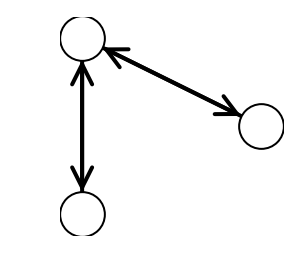

In [8]:
pos = nx.layout.circular_layout(g)

node_sizes = [3 + 10 * i for i in range(len(g))]
m = g.number_of_edges()
edge_colors = range(2, m + 2)
edge_alphas = [(5 + i) / (m + 4) for i in range(m)]

nodes = nx.draw_networkx_nodes(g, pos, node_size=500, node_color='w', edgecolors='k')
edges = nx.draw_networkx_edges(g, pos, node_size=500, arrowstyle='->',
                               arrowsize=25, #edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
# for i in range(m):
#     edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.show()

In [48]:
import pkgutil
list(pkgutil.iter_importers('pyphase.tests.sim.sim'))

[FileFinder('/Users/tel/git/pyphase/pyphase/tests')]

In [50]:
import pyphase.tests.sim

pyphase.tests.sim.__path__

['/Users/tel/git/pyphase/pyphase/tests/sim']

In [64]:
~-1

0